In [427]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [428]:
df = pd.read_csv("train.csv")

df_scaled = df.drop("SalePrice" ,axis=1)#scaled data
#df_scaled = df

df.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1820,1,240,1026,1133,2,8,1925,1950,184000
1,7,1646,1,240,918,918,2,7,1941,1950,164000
2,5,1316,2,484,926,926,1,6,1929,2001,130000
3,10,2402,3,672,3094,2402,2,10,2008,2008,555000
4,7,1253,2,402,1237,1253,2,6,1995,1996,176000


In [429]:
m,n=df_scaled.shape
print(m, n)

1168 10


In [430]:
#standardization Scaling 
"""
for i in range(n):
    x= df.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:,i]= stanadardized_x

df_stanadardized.head()

"""
#Min Max Scaling
for i in range(n):    
    series = df.iloc[:, i]
    
    # Min-Max Scaling (Normalization)
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:,i] = (series - min_value) / (max_value - min_value)



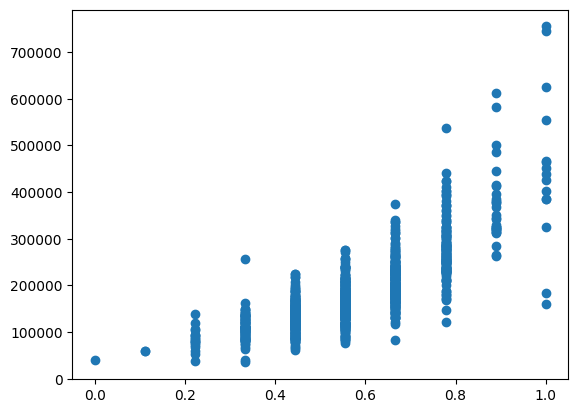

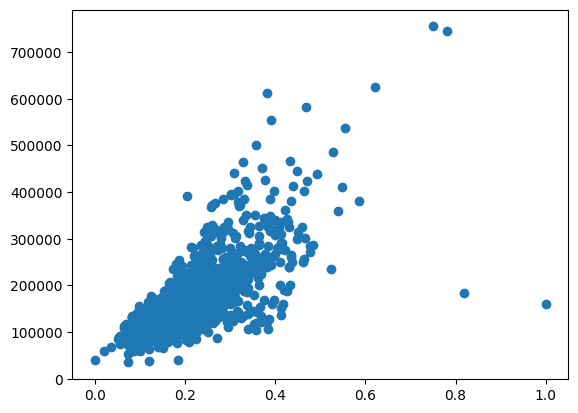

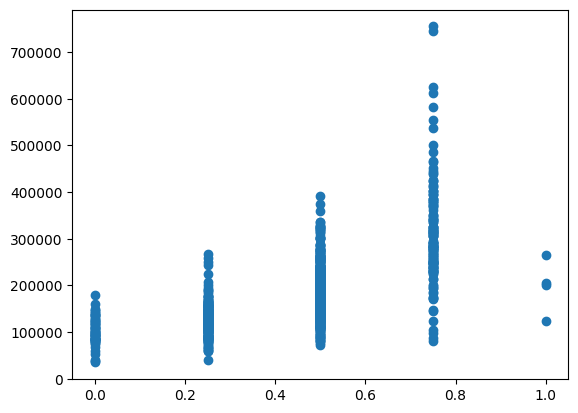

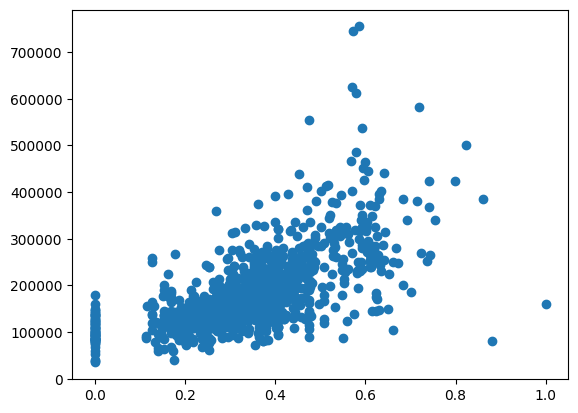

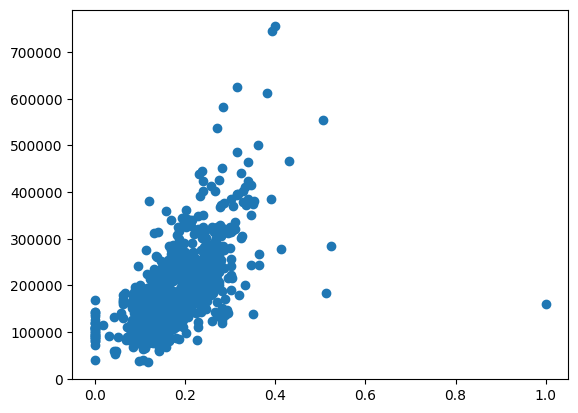

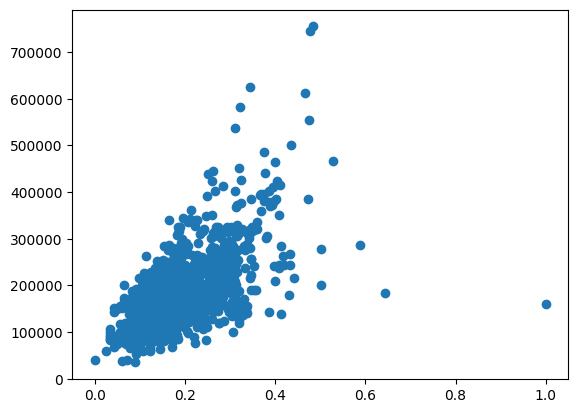

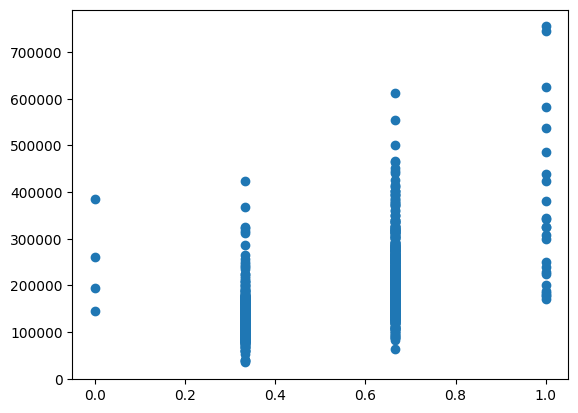

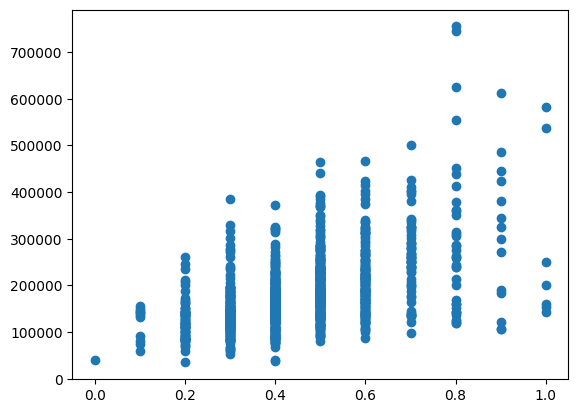

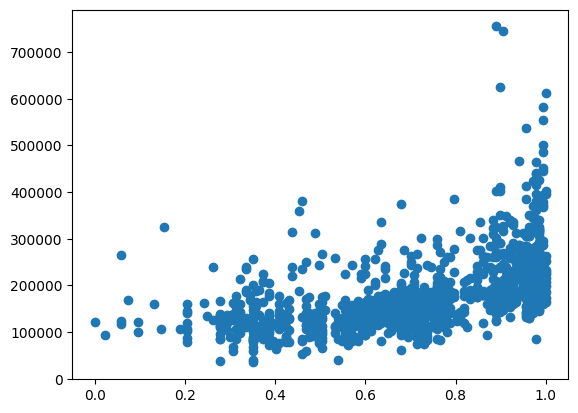

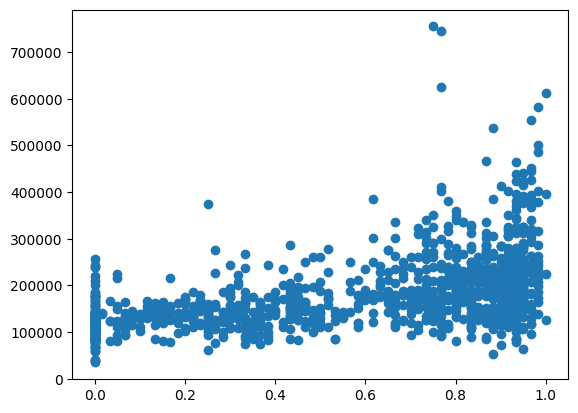

In [431]:
Y = df.iloc[:, n]
X = df_scaled.to_numpy()

for i in range(n):
    plt.scatter(df_scaled.iloc[:, i], Y)
    plt.show()

In [432]:

w = np.zeros(n) #parameter vector
b=0

alpha = 0.05 #learniing rate

lamb = 2*pow(10,0)# regularization factor

epochs = 100 #number of iterations

Cost=np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))#a pandas series 
    Y_pred = np.dot(X, w) + b * pd.Series(np.ones(m))
    
    D_w = X*(1/m)*np.sum(Y_pred- Y) + (lamb/(2*m))*w
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2)) + (lamb/(2*m))*np.sum(w**2) 
    Cost[i]= cost
    
    w = w - alpha * D_w[0]
    b = b - alpha * D_b

print(w, b)

[46875.46989945 19684.51816237 17578.3012123  11900.68347236
 11807.0946277  12891.29203178 46875.46989945 42187.92290951
 27201.45881027     0.        ] 70591.02468377072


In [433]:
cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2))
print(cost)

1752222055.577344


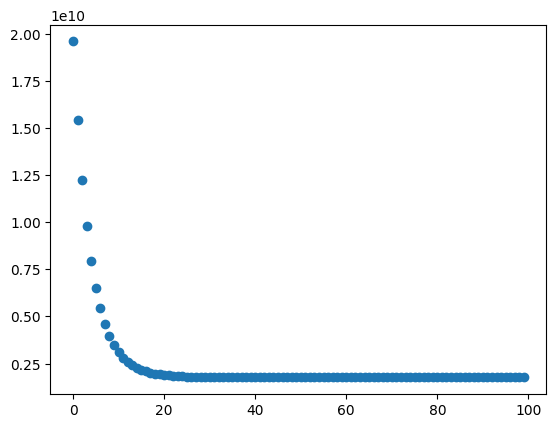

In [434]:
plt.scatter(iter, Cost)
plt.show()

In [435]:
df_test = pd.read_csv("test.csv")
df_test_scaled = df_test.drop("SalePrice" ,axis=1)
df_test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,8,1970,3,753,1085,1120,2,8,2006,2006,281000
1,6,1632,1,338,1240,1632,2,6,1958,1988,139000
2,7,1223,2,480,600,520,2,4,2005,2005,147400
3,5,1559,2,812,1559,1559,1,5,1948,1973,153500
4,4,630,1,286,630,630,1,3,1970,2002,86000


In [436]:
m_test, n_test= df_test_scaled.shape
print(m_test, n_test)

292 10


In [437]:
for i in range(n_test-1):    
    series = df_test_scaled.iloc[:, i]
    
    # Min-Max Scaling (Normalization)
    min_value = series.min()
    max_value = series.max()
    df_test_scaled.iloc[:,i] = (series - min_value) / (max_value - min_value)

In [438]:
Y_test = df_test.iloc[:,n_test]
X_test = df_test_scaled.to_numpy()

df_test_scaled.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.777778,0.476343,0.75,0.541727,0.339062,0.261905,0.666667,0.454545,0.969231,2006
1,0.555556,0.368286,0.25,0.243165,0.387500,0.441176,0.666667,0.272727,0.600000,1988
2,0.666667,0.237532,0.50,0.345324,0.187500,0.051821,0.666667,0.090909,0.961538,2005
3,0.444444,0.344949,0.50,0.584173,0.487187,0.415616,0.333333,0.181818,0.523077,1973
4,0.333333,0.047954,0.25,0.205755,0.196875,0.090336,0.333333,0.000000,0.692308,2002


In [439]:
Y_pred_test = np.dot(X_test, w) + b * pd.Series(np.ones(m_test))
cost = (1/(2*m_test))*np.sum(pow(Y_pred_test-Y_test, 2))
print(cost)

1474166599.6755095


In [440]:
def absolute_error_percentage(Y_pred_test, Y_test):
        error = np.abs(Y_pred_test - Y_test)
        error_percentage = error * 100 / Y_test
        absolute_error_percentage = np.sum(error_percentage)/m_test
        return absolute_error_percentage

def mean_squared_error_percentage(Y_pred_test, Y_test):
        error = (Y_pred_test - Y_test)**2
        error_percentage = error * 100 / (Y_test**2)
        mean_squared_error_percentage = np.sum(error_percentage)/m_test
        return mean_squared_error_percentage


print(f'average_error_percentage= {absolute_error_percentage(Y_pred_test, Y_test)}')
print(f'mean_squared_error_percentage= {mean_squared_error_percentage(Y_pred_test, Y_test)}')


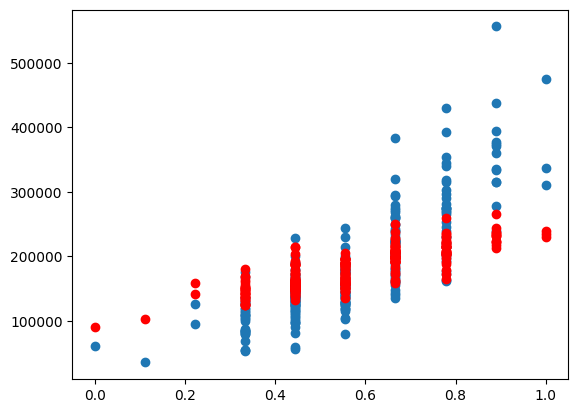

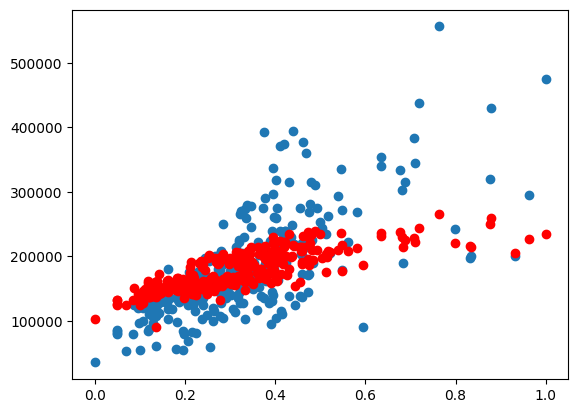

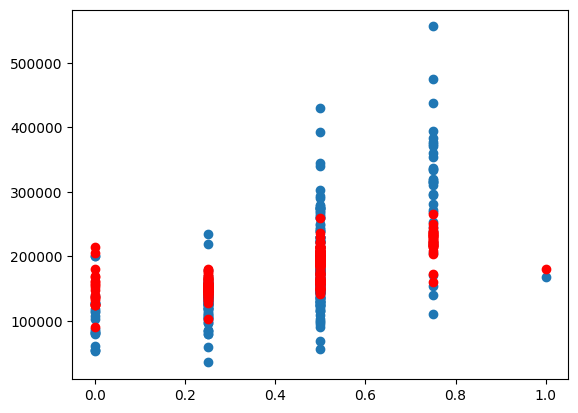

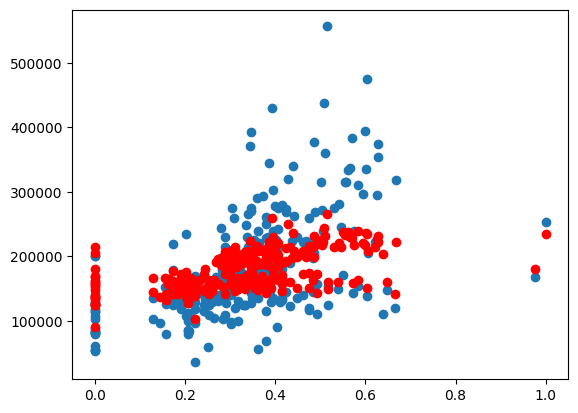

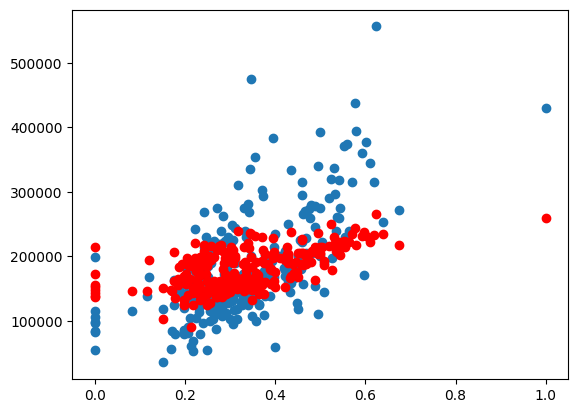

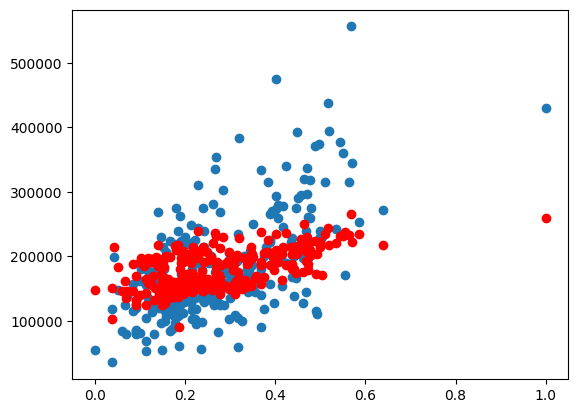

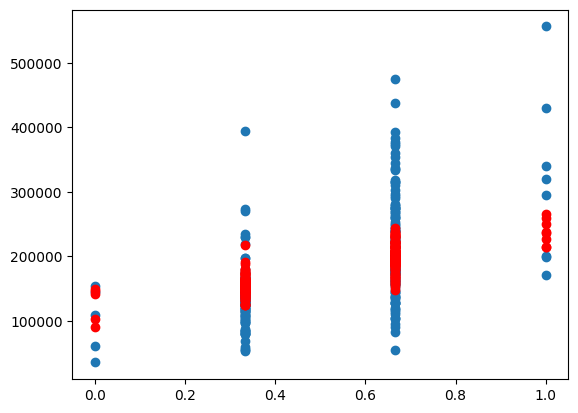

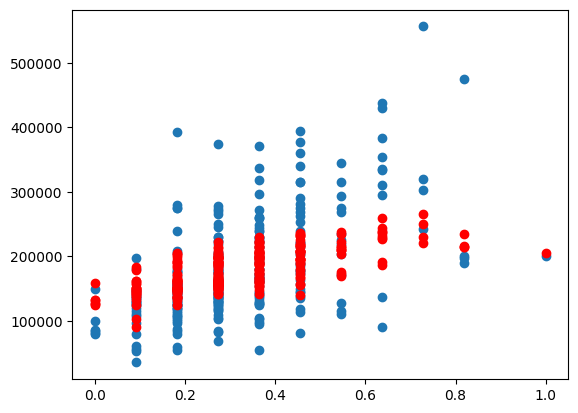

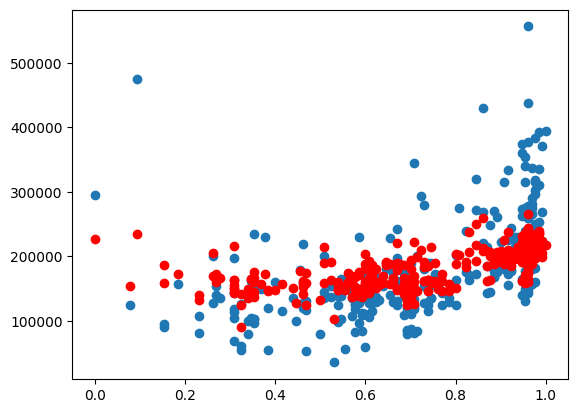

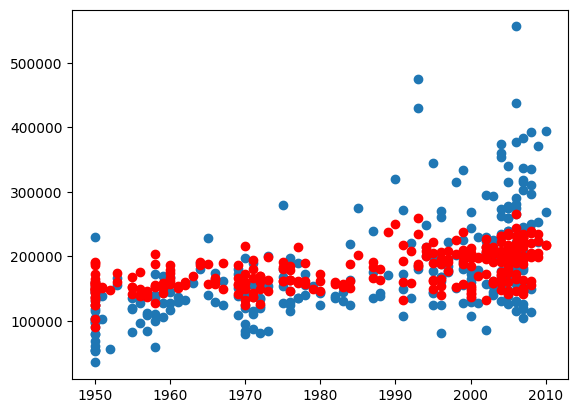

In [442]:
for i in range(n_test):
    plt.scatter(df_test_scaled.iloc[:, i], Y_test)
    plt.scatter(df_test_scaled.iloc[:, i], Y_pred_test, color="red")
    #plt.plot([min(X_test[i]), max(X_test[i])], [min(Y_pred_test), max(Y_pred_test)], color='red')
    plt.show()